# CNN: VGG-16

### CA4 @ AI Course

*Full Name:* Darya Ansaripour

*SID:* 610300022

In this part of the assignment we want to do an image classification task using PyTorch on CIFAR10 dataset.

## Introduction

A Convolutional Neural Network (CNN) architecture is a deep learning model designed for processing structured grid-like data, such as images. It consists of multiple layers, including convolutional, pooling, and fully connected layers. CNNs are highly effective for tasks like image classification, object detection, and image segmentation due to their hierarchical feature extraction capabilities.

## VGG-16

The VGG-16 model is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is characterized by its depth, consisting of 16 layers, including 13 convolutional layers and 3 fully connected layers. VGG-16 is renowned for its simplicity and effectiveness, as well as its ability to achieve strong performance on various computer vision tasks, including image classification and object recognition. The model’s architecture features a stack of convolutional layers followed by max-pooling layers, with progressively increasing depth. This design enables the model to learn intricate hierarchical representations of visual features, leading to robust and accurate predictions. Despite its simplicity compared to more recent architectures, VGG-16 remains a popular choice for many deep learning applications due to its versatility and excellent performance.

The ImageNet Large Scale Visual Recognition Challenge (ILSVRC) is an annual competition in computer vision where teams tackle tasks including object localization and image classification. VGG16, proposed by Karen Simonyan and Andrew Zisserman in 2014, achieved top ranks in both tasks, detecting objects from 200 classes and classifying images into 1000 categories. This model achieves 92.7% top-5 test accuracy on the ImageNet dataset which contains 14 million images belonging to 1000 classes.


![](https://i.postimg.cc/qR2ghvVg/VGG-16.png)

The architecture of VGG-16 — Image from [Researchgate.net](https://www.researchgate.net/publication/321829624_Leaf_App_Leaf_recognition_with_deep_convolutional_neural_networks)


Here’s a breakdown of the VGG-16 architecture:

1. Convolutional Layers (64 filters, 3×3 filters, same padding):
    - Two consecutive convolutional layers with 64 filters each and a filter size of 3×3.
    - Same padding is applied to maintain spatial dimensions.
2. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
3. Convolutional Layers (128 filters, 3×3 filters, same padding):
    - Two consecutive convolutional layers with 128 filters each and a filter size of 3×3.
4. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
5. Convolutional Layers (256 filters, 3×3 filters, same padding):
    - Three consecutive convolutional layers with 256 filters each and a filter size of 3×3.
6. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
7. Convolutional Layers (512 filters, 3×3 filters, same padding):
    - Three sets of three consecutive convolutional layers with 512 filters each and a filter size of 3×3.
8. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
9. Convolutional Layers (512 filters, 3×3 filters, same padding):
    - Three sets of three consecutive convolutional layers with 512 filters each and a filter size of 3×3.
10. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
11. Flattening:
    - Flatten the output feature map.
12. Fully Connected Layers:
    - Three fully connected layers with ReLU activation.
    - First layer with input size 512 and output size 4096.
    - Second layer with input size 4096 and output size 4096.
    - Third layer with input size 4096 and output size 10, corresponding to the 10 classes in the CIFAR10 dataset.
    - Softmax activation is applied to the output of the third fully connected layer for classification.

This architecture follows the specifications provided, including the use of ReLU activation function and the final fully connected layer outputting probabilities for 10 classes using softmax activation.

source: [geeksforgeeks](https://www.geeksforgeeks.org/vgg-16-cnn-model/)

## Model

Define your VGG16 model here from scratch (You are not allowed to use the existing models in pytorch)

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import numpy as np

In [ ]:
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
# from torchsummary import summary
# summary(VGG16(), input_size=(3, 32, 32))

Now, let's train and test our model on the CIFAR-10 dataset.

## Device

Set device to work with (GPU or CPU)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Transforms & Dataset & Dataloader

Here, you should download and load the dataset with the desire transforms. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.491, 0.482, 0.446), std=(0.247, 0.243, 0.261)),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.491, 0.482, 0.446), std=(0.247, 0.243, 0.261)),
])

In [ ]:
# inverse the normilize transform to restore the original data
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = torch.tensor(mean)
        self.std = torch.tensor(std)

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be unnormalized.
        Returns:
            Tensor: Unnormalized image.
        """
        # TODO
        return tensor * self.std.view(3, 1, 1) + self.mean.view(3, 1, 1)

norminv = UnNormalize(mean=(0.491, 0.482, 0.446), std=(0.247, 0.243, 0.261))

In [ ]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

BATCH_SIZE = 128

initial_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainset, valset = random_split(initial_trainset, [40000, 10000])


trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 5 random images from each class in different columns

- **Hint**:  You can use `plt.subplots` for visualization

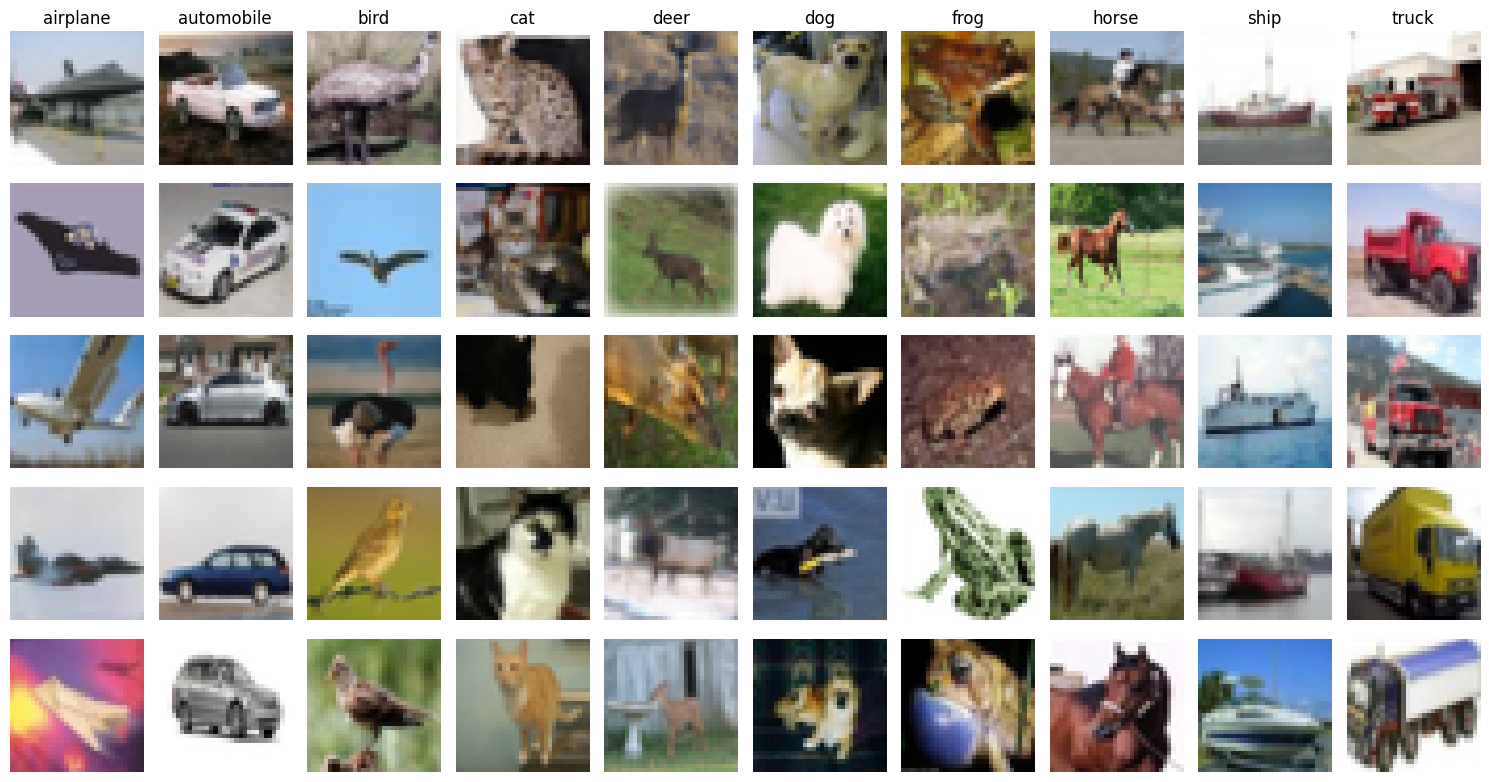

In [ ]:
# TODO
import matplotlib.pyplot as plt
classes = initial_trainset.classes

def visualize_samples(loader, classes, num_samples=5):
    data_iter = iter(loader)
    images, labels = next(data_iter)

    class_samples = {cls: [] for cls in range(len(classes))}

    for img, label in zip(images, labels):
        if len(class_samples[label.item()]) < num_samples:
            class_samples[label.item()].append(img)

    fig, axes = plt.subplots(num_samples, len(classes), figsize=(15, 8))
    for col, cls in enumerate(classes):
        for row in range(num_samples):
            if class_samples[col]:
                img = norminv(class_samples[col][row])
                img = img.permute(1, 2, 0).numpy()
                axes[row, col].imshow(img)
            axes[row, col].axis('off')
            if row == 0:
                axes[row, col].set_title(cls)

    plt.tight_layout()
    plt.show()

visualize_samples(trainloader, classes)

## Train

### Model instantiation

Create an instance of your model and move it to `device`

In [ ]:
# TODO
net = VGG16(num_classes=10).to(device)
print(net)

VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

### Criterion & Optimizater

Define `criterion` and `optimizer`

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()    # TODO
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# optimizer = optim.Adam(net.parameters(), lr=0.01)    # TODO

### Train loop

Train your model

Tasks:
- Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Train accuracy
  - Validation loss
  - Validation accuracy
- Save train/validation loss and accuracy (of each epoch) in an array for later usage

In [ ]:
def train_epoch(net: torch.nn.Module, criterion: torch.nn.Module, optimizer: torch.optim.Optimizer, dataloader: torch.utils.data.DataLoader, device: torch.device):
    net.train()  # Set the model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients

        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

        running_loss += loss.item() * inputs.size(0)  # Accumulate loss
        _, predicted = outputs.max(1)  # Get predictions
        correct_preds += predicted.eq(labels).sum().item()  # Count correct predictions
        total_preds += labels.size(0)  # Total number of samples

    epoch_loss = running_loss / total_preds
    epoch_acc = correct_preds / total_preds

    return epoch_loss, epoch_acc


def eval_epoch(net: torch.nn.Module, criterion: torch.nn.Module, dataloader: torch.utils.data.DataLoader, device: torch.device):
    net.eval()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():  # No need to compute gradients during evaluation
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct_preds += predicted.eq(labels).sum().item()
            total_preds += labels.size(0)

    epoch_loss = running_loss / total_preds
    epoch_acc = correct_preds / total_preds

    return epoch_loss, epoch_acc




In [ ]:
epochs = 10
history = {'train_loss':[], 'train_acc':[], 'val_loss':[], 'val_acc':[]}

for e in range(epochs):
    # Training phase
    train_loss, train_acc = train_epoch(net, criterion, optimizer, trainloader, device)

    # Validation phase
    val_loss, val_acc = eval_epoch(net, criterion, valloader, device)

    print(f"Epoch {e+1}/{epochs}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc*100:.2f}%")
    print(f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)


Epoch 1/10:
  Train Loss: 0.1301, Train Accuracy: 95.73%
  Validation Loss: 0.6932, Validation Accuracy: 80.62%
Epoch 2/10:
  Train Loss: 0.1067, Train Accuracy: 96.61%
  Validation Loss: 0.6977, Validation Accuracy: 81.66%
Epoch 3/10:
  Train Loss: 0.0909, Train Accuracy: 97.00%
  Validation Loss: 0.7999, Validation Accuracy: 80.26%
Epoch 4/10:
  Train Loss: 0.0759, Train Accuracy: 97.42%
  Validation Loss: 0.8002, Validation Accuracy: 80.19%
Epoch 5/10:
  Train Loss: 0.0693, Train Accuracy: 97.71%
  Validation Loss: 0.8261, Validation Accuracy: 79.36%
Epoch 6/10:
  Train Loss: 0.0525, Train Accuracy: 98.32%
  Validation Loss: 0.6721, Validation Accuracy: 83.89%
Epoch 7/10:
  Train Loss: 0.0504, Train Accuracy: 98.32%
  Validation Loss: 0.6974, Validation Accuracy: 84.29%
Epoch 8/10:
  Train Loss: 0.0374, Train Accuracy: 98.80%
  Validation Loss: 0.7573, Validation Accuracy: 83.88%
Epoch 9/10:
  Train Loss: 0.0397, Train Accuracy: 98.67%
  Validation Loss: 0.7027, Validation Accuracy:

### Visualize Loss and Accuracy plot

Using the arrays that you have (from task 2 in the above section), visualize two plots: Accuracy plot (train and validation together) and Loss plot (train and validation together)

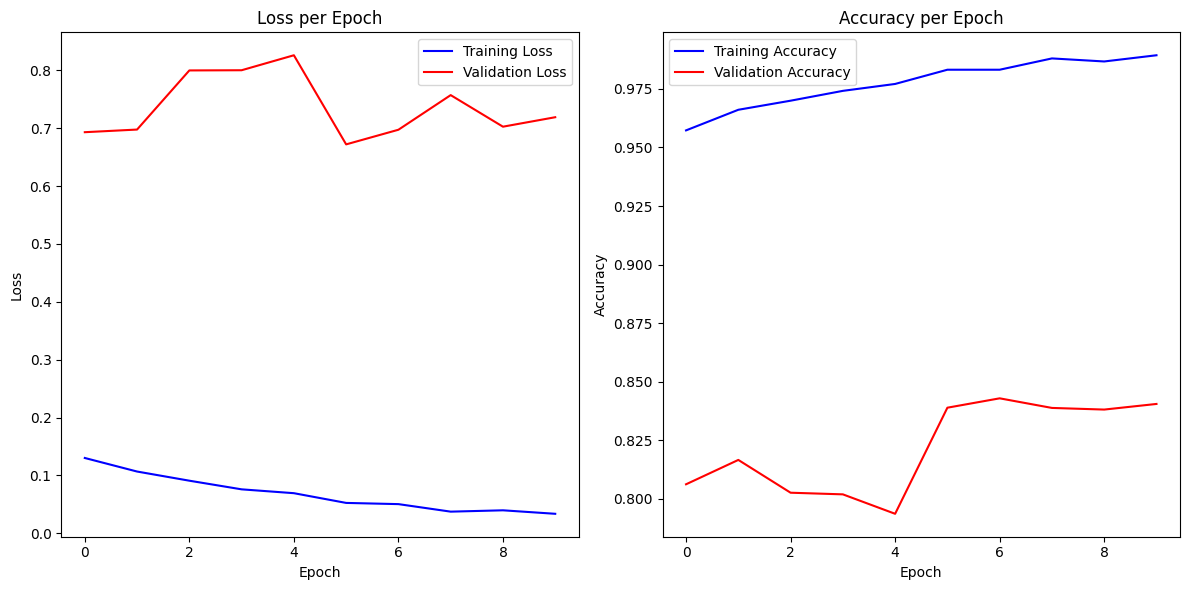

In [ ]:
train_loss = history['train_loss']
train_acc = history['train_acc']
val_loss = history['val_loss']
val_acc = history['val_acc']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Training Loss', color='blue')
plt.plot(range(epochs), val_loss, label='Validation Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(epochs), val_acc, label='Validation Accuracy', color='red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Evaluation

Test your trained model (using the Test Dataloader that you have). Our goal is to reach an accuracy above `70%`

In [ ]:
# TODO
# Evaluate the model on the test set
test_loss, test_acc = eval_epoch(net, criterion, testloader, device)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Loss: 0.7355
Test Accuracy: 83.86%


### Q7.
- Role of Convolutional Layers in CNNs
  - Extract local patterns and hierarchical features (e.g., edges, textures) from the input data.
  - Reduce the input's spatial dimensions while retaining important features using kernels/filters.
  - Apply convolution operations across the input to detect spatial relationships in images or other structured data.

- Why we use fully connected layers afterward?
  - Combine the extracted features from convolutional layers to make final predictions.
  - Act as a classifier by learning relationships between the high-level features and the target out


### Q8.
- Why not fully connected layers?
    - Fully connected layers require every input to connect to every neuron, leading to an enormous number of parameters for high-dimensional data like images.

    - Fully connected layers treat all inputs as independent, ignoring spatial relationships (e.g., nearby pixels in images).
    
    - Fully connected layers lack the structure to learn features hierarchically (low-level to high-level).

- Why Convolutional Layers Are Better:
    - Convolutional layers focus on local regions, making them computationally efficient.
    - They preserve spatial information and build hierarchical features critical for structured data like images.


Done!